In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the LDA items from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *

from wordcloud import STOPWORDS

In [ ]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')

In [ ]:
ICTR = GTC_V2.loc[GTC_V2['tribunal']=="ICTR"] #Select the data from tribunal ICTR

In [ ]:
text_pipeline = Pipeline([
     ('tokenize', CountVectorizer(max_features=1000, stop_words="english", ngram_range = (1,2))),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=20))
    ]) #Create a pipeline which tokenizes the data, performs a TF-IDF transformation, and applies LDA

In [ ]:
np.random.seed(24601) #Randomize the seed

text_pipeline.fit_transform(ICTR["text"]); #Fit-transform to the text column

In [ ]:
word_list = text_pipeline["tokenize"].get_feature_names_out()
topic_num = 0 #Picking a topic number; Topics are assigned numbers by the code, we have to figure out what they are (not always easy)
num_words = 10 #Picking the number of words to see from that topic

df = pd.DataFrame({"words": word_list, "weights": text_pipeline["lda"].components_[topic_num]}) #Making all of this into a DataFrame

df.sort_values("weights", ascending=False).head(num_words)

,words,weights
845,statement,126.120028
611,pages,73.301028
711,read,64.357182
610,page,57.326678
760,right,44.897102
846,statements,41.739932
178,court,37.191222
814,signed,33.808559
454,list,30.988432
559,names,29.923868


In [ ]:
def plot_top_words(pipeline, n_top_words=10, grid_shape=[5,5]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.3, wspace=0.90, hspace=0.1)
    plt.show()

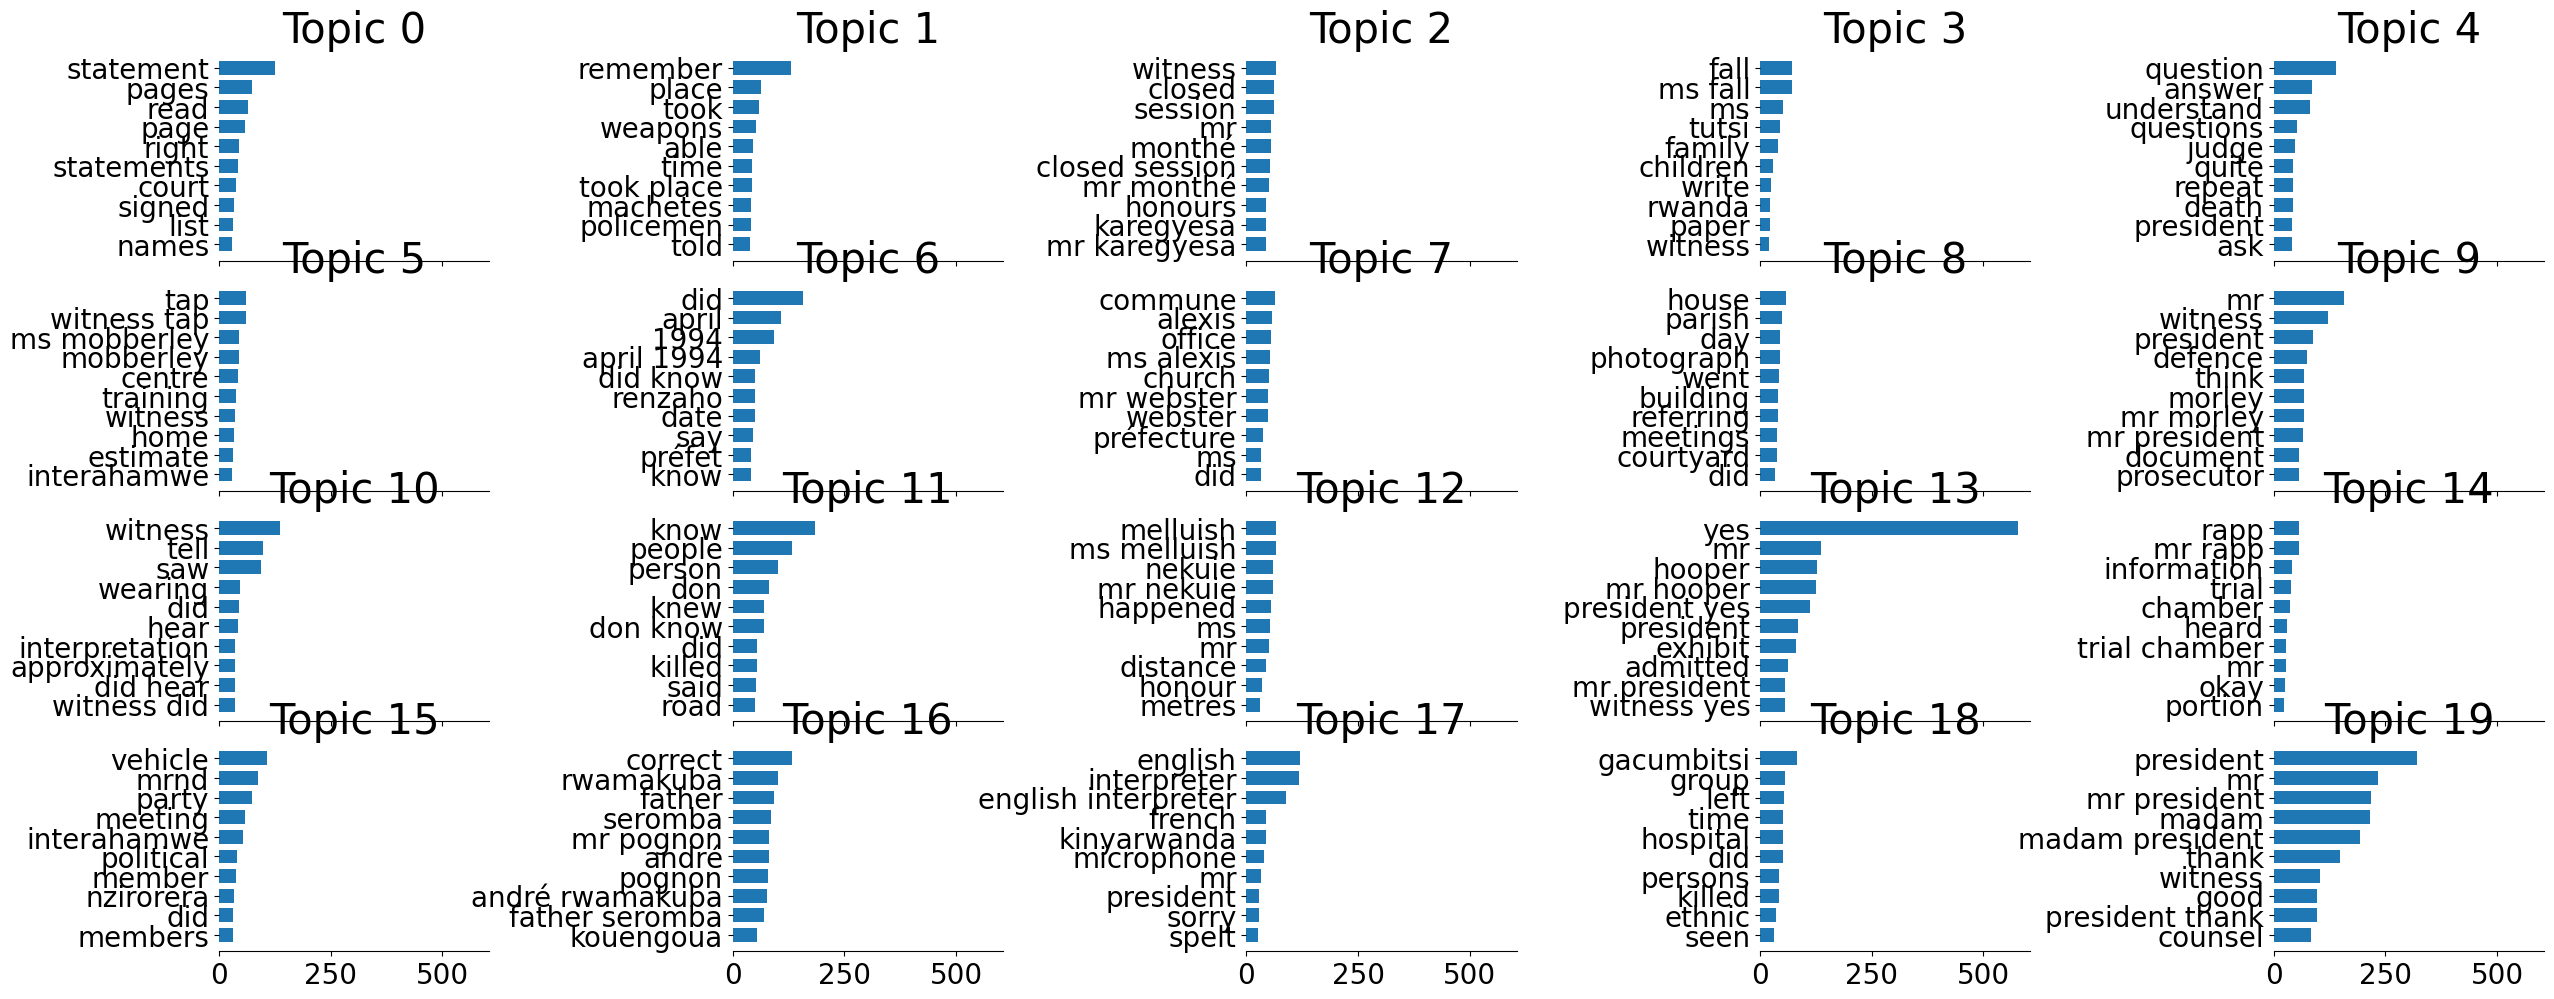

In [ ]:
plot_top_words(text_pipeline, 10, [4,5])